In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

Read the clean data extracted from telecom.sql file and saved as csv file

In [2]:
clean_data = pd.read_csv('../Data/clean_data.csv')
clean_data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [3]:
#get name of columns
clean_data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name',
       'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Handset Manufacturer', 'Handset Type', 'Nb of sec with Vol DL < 6250B',
       'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',
       'Other UL (Bytes)', 'Total UL (

#### the top 10 handsets used by the customers.

1394 users
Number of posts per user


<Axes: xlabel='Handset Type'>

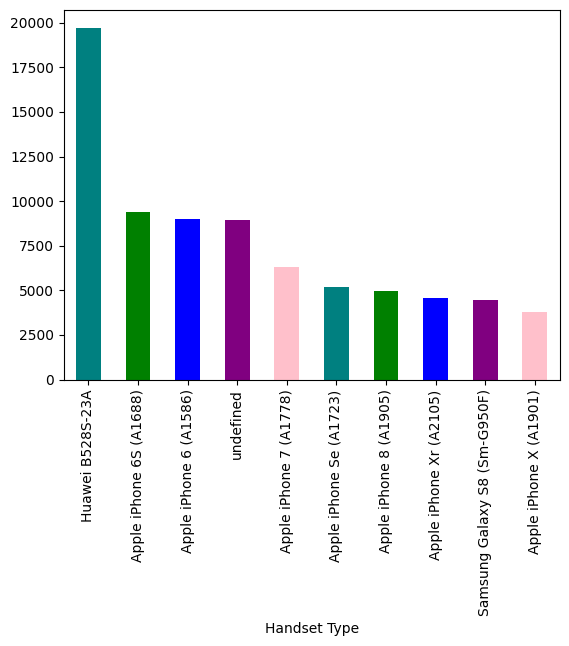

In [4]:
handset_count = clean_data['Handset Type'].value_counts()
print(len(handset_count), "users")
print("Number of posts per user")
handset_count[:10].plot(kind='bar', color=['teal', 'green', 'blue','purple','pink'])

#### the top 3 handset manufacturers

170 users
Number of posts per user


<Axes: xlabel='Handset Manufacturer'>

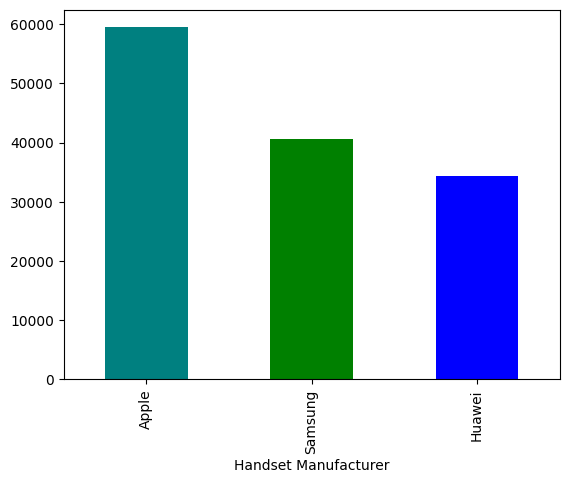

In [5]:
handset_manufacturer = clean_data['Handset Manufacturer'].value_counts()
print(len(handset_manufacturer), "users")
print("Number of posts per user")
handset_manufacturer[:3].plot(
    kind='bar', color=['teal', 'green', 'blue'])

#### the top 5 handsets per top 3 handset manufacturer


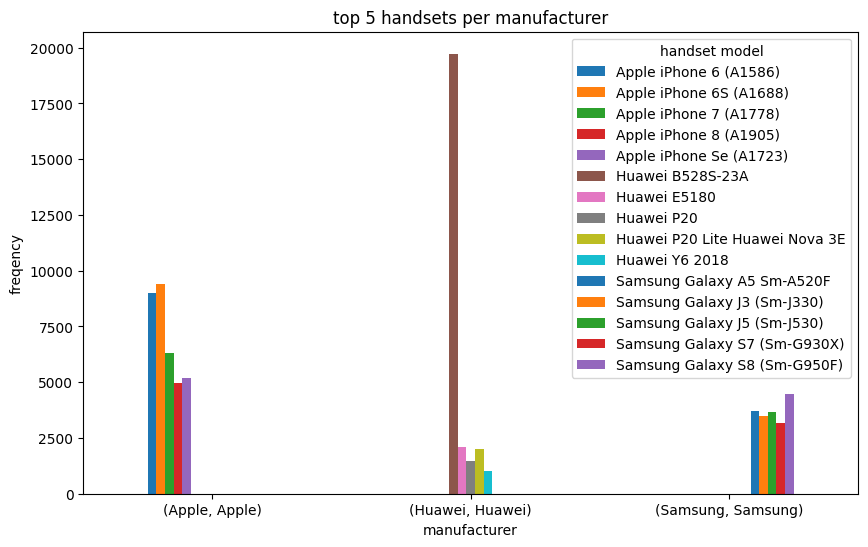

In [6]:
# the top 5 handsets for each of the top 3 handset manufacturer

# Check for null values in the 'HandsetManufacturer' column



manufacturer_counts = clean_data['Handset Manufacturer'].value_counts()

top_3_manufacturers = manufacturer_counts.head(3).index

filtered_df = clean_data[clean_data['Handset Manufacturer'].isin(top_3_manufacturers)]

handset_counts = filtered_df.groupby(['Handset Manufacturer','Handset Type']).size()

top_5_handsets = handset_counts.groupby('Handset Manufacturer').nlargest(5)


top_5_handsets.unstack().plot(kind='bar', figsize=(10,6))
plt.title('top 5 handsets per manufacturer')
plt.xlabel('manufacturer')
plt.ylabel('freqency')
plt.xticks(rotation=0)
plt.legend(title = 'handset model')
plt.show()

<Axes: xlabel='Handset Manufacturer,Handset Type'>

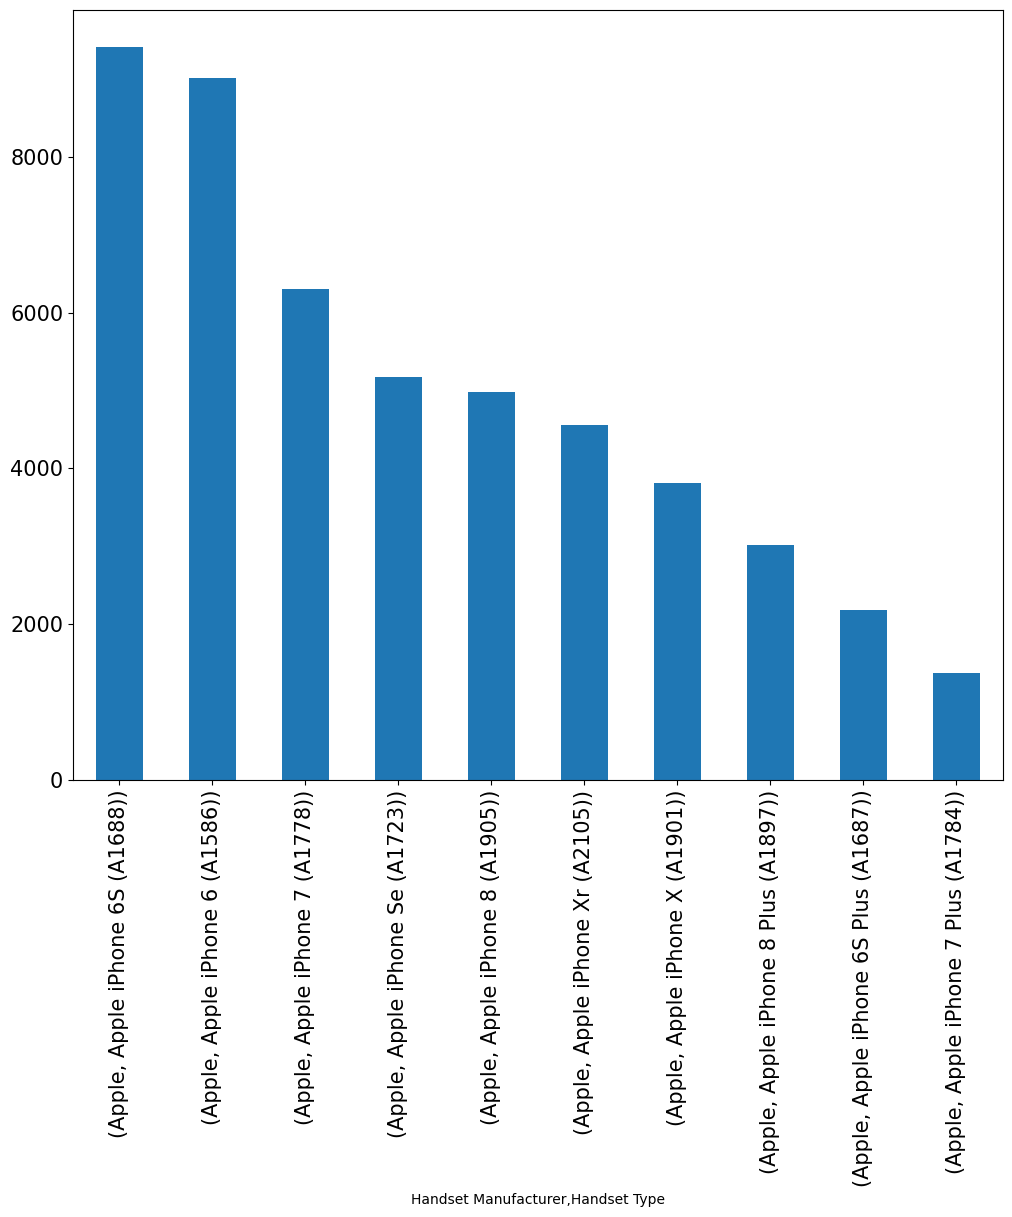

In [7]:
handset_man= clean_data[clean_data['Handset Manufacturer'].isin(['Apple','Sumsung','Huawei'])]
handset_man.groupby('Handset Manufacturer')['Handset Type'].value_counts()[:10].plot.bar(
    figsize=(12, 10), fontsize=15)

In [8]:
# Grouping data per user and aggregating metrics
aggregated_data = clean_data.groupby('MSISDN/Number').agg({
    'Dur. (ms)': 'count',  # Counting the number of sessions
    'Dur. (ms)': 'sum',  # Total session duration
    'Total UL (Bytes)': 'sum',
    'Total DL (Bytes)': 'sum',
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
    'Other UL (Bytes)': 'sum'
}).reset_index()
aggregated_data.head()  # Display the first few rows

,MSISDN/Number,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
0,3.360100e+10,116720.0,36053108.0,8.426375e+08,2206504.0,25631.0,3337123.0,1051882.0,837400.0,493962.0,14900201.0,6724347.0,10265105.0,16915876.0,8.110911e+08,1367528.0,377096990.0,9473882.0
1,3.360100e+10,181230.0,36104459.0,1.207552e+08,2598548.0,62017.0,4197697.0,1137166.0,2828821.0,478960.0,5324251.0,7107972.0,770569.0,10451194.0,1.050353e+08,14714780.0,279557701.0,2152370.0
2,3.360100e+10,134969.0,39306820.0,5.566597e+08,3148004.0,47619.0,3343483.0,99643.0,2436500.0,768880.0,2137272.0,19196298.0,16525919.0,2827981.0,5.290685e+08,9759228.0,495086501.0,6607171.0
3,3.360101e+10,49878.0,20327526.0,4.019932e+08,251469.0,28825.0,5937765.0,3740728.0,2178618.0,106052.0,4393123.0,2584198.0,1157362.0,784730.0,3.880748e+08,3051292.0,25248001.0,10031701.0
4,3.360101e+10,37104.0,94280527.0,1.363130e+09,2861230.0,51312.0,13728668.0,4770948.0,2247808.0,1057661.0,10339971.0,31193031.0,24971647.0,24230077.0,1.308981e+09,5816727.0,777643713.0,27160771.0



### Analyze basic metrics in the dataset

In [9]:
summary_stats = clean_data.describe()
summary_stats

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.489350e+05,148935.000000,148935.000000,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,148935.000000,148935.000000,148935.000000,...,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05
mean,1.015510e+19,499.246732,498.675442,1.048702e+05,2.082016e+14,4.188282e+10,4.849493e+13,13286.171390,1770.786497,92.898889,...,1.163345e+07,1.100867e+07,1.162756e+07,1.100017e+07,4.220256e+08,8.289085e+06,4.211473e+08,8.263189e+06,4.111764e+07,4.546251e+08
std,2.893257e+18,288.555630,288.089136,8.106343e+04,1.522166e+10,2.447443e+12,2.242829e+13,23978.591234,4629.475837,13.006268,...,6.711384e+06,6.345428e+06,6.724686e+06,6.358918e+06,2.439763e+08,4.782090e+06,2.431970e+08,4.768708e+06,1.127933e+07,2.441528e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.788350e+04,2.082014e+14,3.365130e+10,3.546071e+13,43.000000,47.000000,91.000000,...,5.831331e+06,5.516710e+06,5.779947e+06,5.474451e+06,2.104587e+08,4.130162e+06,2.102119e+08,4.145072e+06,3.321774e+07,2.430996e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572221e+13,63.000000,63.000000,100.000000,...,1.161638e+07,1.101329e+07,1.164269e+07,1.099563e+07,4.234208e+08,8.291222e+06,4.218716e+08,8.266089e+06,4.114101e+07,4.558708e+08
75%,1.304243e+19,749.000000,750.000000,1.327000e+05,2.082018e+14,3.368349e+10,8.611970e+13,19681.000000,1117.000000,100.000000,...,1.744571e+07,1.651442e+07,1.747072e+07,1.650429e+07,6.331620e+08,1.243184e+07,6.316602e+08,1.238204e+07,4.903248e+07,6.656577e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.082522e+14,8.823971e+14,9.900120e+13,378160.000000,58613.000000,100.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


### Non-Graphical Univariate Analysis

In [10]:
# Dispersion parameters for quantitative variables
dispersion_params = clean_data[['Total UL (Bytes)', 'Total DL (Bytes)', 'Social Media DL (Bytes)', 
                          'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)',
                          'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']].std()
dispersion_params

Total UL (Bytes)           1.127933e+07
Total DL (Bytes)           2.441528e+08
Social Media DL (Bytes)    1.035458e+06
Google DL (Bytes)          3.309041e+06
Email DL (Bytes)           1.035910e+06
Youtube DL (Bytes)         6.711384e+06
Netflix DL (Bytes)         6.724686e+06
Gaming DL (Bytes)          2.439763e+08
Other DL (Bytes)           2.431970e+08
dtype: float64

### Graphical Univariate Analysis

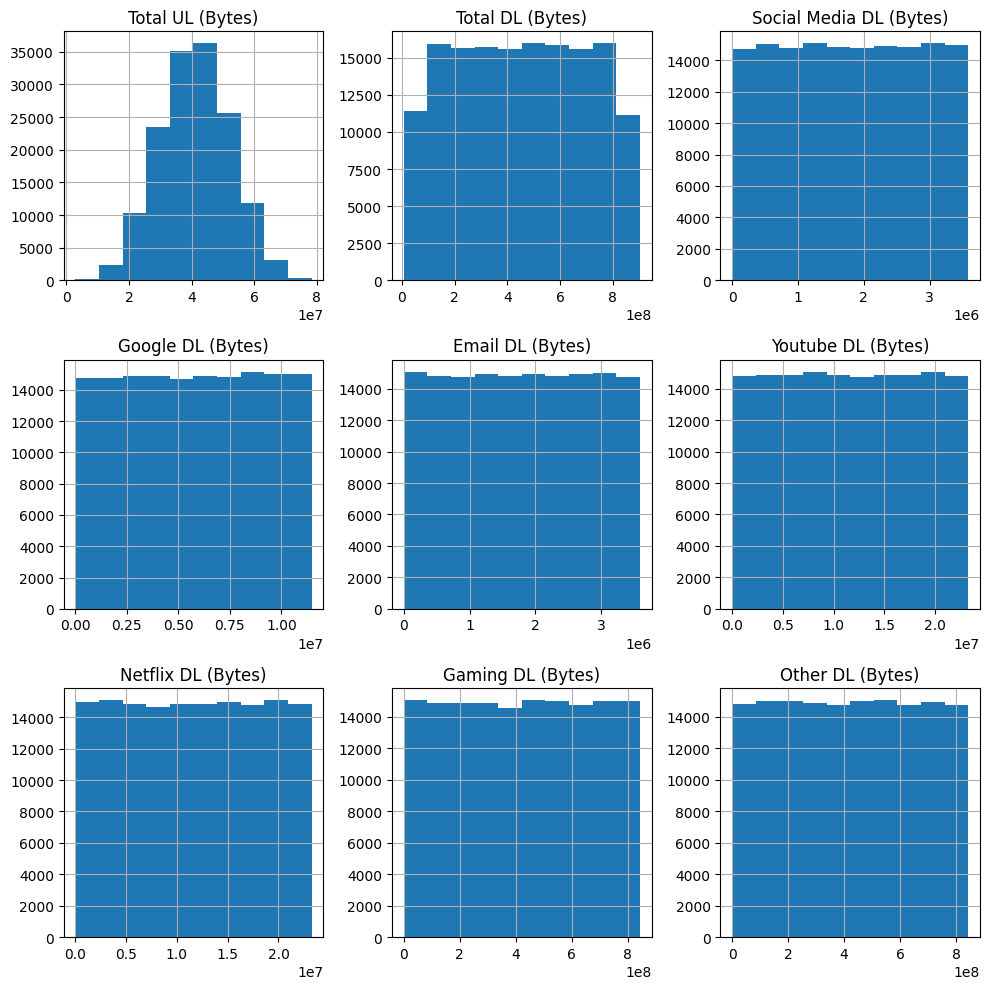

In [11]:
# Histograms for selected variables
clean_data[['Total UL (Bytes)', 'Total DL (Bytes)', 'Social Media DL (Bytes)', 
      'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)',
      'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']].hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

### Bivariate Analysis

In [12]:
# Relationship between each application and total DL+UL data
app_vs_total_data = clean_data[['Total UL (Bytes)', 'Total DL (Bytes)', 'Social Media DL (Bytes)', 
                          'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)',
                          'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']].corr()
app_vs_total_data

,Total UL (Bytes),Total DL (Bytes),Social Media DL (Bytes),Google DL (Bytes),Email DL (Bytes),Youtube DL (Bytes),Netflix DL (Bytes),Gaming DL (Bytes),Other DL (Bytes)
Total UL (Bytes),1.000000,-0.002273,0.005040,-0.001432,-0.002119,-0.000326,-0.000454,-0.002247,-0.001711
Total DL (Bytes),-0.002273,1.000000,0.005475,0.012254,0.004406,0.025748,0.024531,0.999131,-0.002822
Social Media DL (Bytes),0.005040,0.005475,1.000000,-0.002071,0.004902,-0.001181,-0.001498,0.001316,0.005903
Google DL (Bytes),-0.001432,0.012254,-0.002071,1.000000,0.000009,0.002076,0.000962,-0.001375,-0.002596
Email DL (Bytes),-0.002119,0.004406,0.004902,0.000009,1.000000,0.001475,0.001168,0.000069,-0.000251
Youtube DL (Bytes),-0.000326,0.025748,-0.001181,0.002076,0.001475,1.000000,0.001026,-0.001799,0.001958
Netflix DL (Bytes),-0.000454,0.024531,-0.001498,0.000962,0.001168,0.001026,1.000000,-0.003054,-0.005690
Gaming DL (Bytes),-0.002247,0.999131,0.001316,-0.001375,0.000069,-0.001799,-0.003054,1.000000,-0.002710
Other DL (Bytes),-0.001711,-0.002822,0.005903,-0.002596,-0.000251,0.001958,-0.005690,-0.002710,1.000000


### Variable transformations

In [13]:
# Segment users into deciles based on total session duration
clean_data['Total_Session_duration'] = clean_data['Dur. (ms)'].groupby(clean_data['MSISDN/Number']).transform('sum')
clean_data['Decile_Class'] = pd.qcut(clean_data['Total_Session_duration'], q=5, labels=False)

# Compute total data (DL+UL) per decile class
total_data_per_decile = clean_data.groupby('Decile_Class')[['Total UL (Bytes)', 'Total DL (Bytes)']].sum()
total_data_per_decile

,Total UL (Bytes),Total DL (Bytes)
Decile_Class,,
0,1.224447e+12,1.354009e+13
1,1.227024e+12,1.357136e+13
2,1.304259e+12,1.444640e+13
3,1.144745e+12,1.265695e+13
4,1.223381e+12,1.349479e+13


### Correlation Analysis

In [14]:
# Correlation matrix
correlation_matrix = clean_data[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 
                           'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 
                           'Other DL (Bytes)']].corr()
correlation_matrix

,Social Media DL (Bytes),Google DL (Bytes),Email DL (Bytes),Youtube DL (Bytes),Netflix DL (Bytes),Gaming DL (Bytes),Other DL (Bytes)
Social Media DL (Bytes),1.000000,-0.002071,0.004902,-0.001181,-0.001498,0.001316,0.005903
Google DL (Bytes),-0.002071,1.000000,0.000009,0.002076,0.000962,-0.001375,-0.002596
Email DL (Bytes),0.004902,0.000009,1.000000,0.001475,0.001168,0.000069,-0.000251
Youtube DL (Bytes),-0.001181,0.002076,0.001475,1.000000,0.001026,-0.001799,0.001958
Netflix DL (Bytes),-0.001498,0.000962,0.001168,0.001026,1.000000,-0.003054,-0.005690
Gaming DL (Bytes),0.001316,-0.001375,0.000069,-0.001799,-0.003054,1.000000,-0.002710
Other DL (Bytes),0.005903,-0.002596,-0.000251,0.001958,-0.005690,-0.002710,1.000000


### Dimensionality Reduction (Principal Component Analysis - PCA)

In [18]:
import sklearn
from sklearn.decomposition import PCA


# Select relevant columns for PCA
pca_data = clean_data[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 
                 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 
                 'Other DL (Bytes)']]

# Standardize the data
pca_data_standardized = (pca_data - pca_data.mean()) / pca_data.std()

# Perform PCA
pca = PCA(n_components=2)
pca.fit(pca_data_standardized)

# Extract principal components
components = pca.components_
explained_variance = pca.explained_variance_ratio_

print("Principal Components:")
print(components)
print("Explained Variance Ratio:")
print(explained_variance)


Principal Components:
[[-0.56003388  0.31645188 -0.19146796  0.0477651   0.43720385 -0.09574137
  -0.58903748]
 [-0.17268395 -0.26672742 -0.4008746  -0.55019124 -0.3091343   0.54355042
  -0.2112222 ]]
Explained Variance Ratio:
[0.14436429 0.14354523]
